In [1]:
#!python -m pip install statsmodels
#!python -m pip install saspy
#!python -m pip install openpyxl
#!pip install pingouin

In [2]:
## Native Python library
# Used for displaying output in a proper dataframe for ease of reading and understanding
from IPython.display import display

## 3rd party library imports
# stands for panel data -> Used for manipulating dataframes
import pandas as pd


## Graphical Subroutines
# Has a lot of plotting functionalities. Mimics matlab for numerical plotting
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns

## Statistical Libraries
# One of the main statistical modelling libraries in Python.
# Mimics R in the callable functions and the attributes
import statsmodels
# API for calling different models
import statsmodels.api as sm
# API for calling models where the input to the model is in form of a formula like R
# E.g. the formula is y~x
import statsmodels.formula.api as smf
# Stands for SCIentific PYthon
# Has a lot of statistical hypothesis teste along with various probability distributions
from scipy import stats
import scipy.stats as sts
# Stands for NUMerical PYthon
# Has a lot of functions for both scalar and vector algebra
import numpy as np
# Library to run partial correlation
import pingouin as pg
# Library to generate various permutation and combination of different elements
import itertools
## sklearn imports
# Stands for Sci Kit LEARN
# Python's one of the most popular machine learning library containing various models
import sklearn
# Submodule used to split the data into training and test
from sklearn.model_selection import train_test_split
# Submodule used to scale the data
from sklearn.preprocessing import StandardScaler
# Submodule for linear regression
from sklearn.linear_model import LinearRegression
# Submodule for Recursive Feature Elimination and Recursive Feature Elimination with Cross Validation
from sklearn.feature_selection import RFE, RFECV
# Submodule that contains various model evaluation parameters
from sklearn import metrics


%matplotlib inline


C:\Users\Usuario\Documents\Anaconda_installation\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
B2B_df = pd.read_excel('B2B_265.xlsx') # Replace the appropriate user path - pd.read_csv('C:/Userpath/Cars_1993.csv')

In [4]:
B2B_df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,2,0,1,1,1,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1
1,2,3,1,0,0,0,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0
2,3,3,0,1,1,1,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1
3,4,1,1,1,1,0,6.4,3.3,7.0,3.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0
4,5,2,0,1,0,1,9.0,3.4,5.2,4.6,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0


In [5]:
B2B_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,265.0,133.000000,76.643112,1.0,67.0,133.0,199.0,265.0
X1,265.0,2.018868,0.818595,1.0,1.0,2.0,3.0,3.0
X2,265.0,0.509434,0.500857,0.0,0.0,1.0,1.0,1.0
X3,265.0,0.498113,0.500943,0.0,0.0,0.0,1.0,1.0
X4,265.0,0.588679,0.493004,0.0,0.0,1.0,1.0,1.0
X5,265.0,0.467925,0.499914,0.0,0.0,0.0,1.0,1.0
X6,265.0,7.915849,1.381169,5.0,6.7,8.0,9.1,10.0
X7,265.0,3.755849,0.758870,2.2,3.3,3.7,4.1,5.7
X8,265.0,5.254340,1.655841,0.4,4.1,5.3,6.5,8.9
X9,265.0,5.382264,1.211102,1.5,4.5,5.4,6.2,8.7


In [6]:
Y = B2B_df[['X19']]
Y

,X19
0,8.2
1,5.7
2,8.9
3,4.8
4,7.1
...,...
260,5.6
261,8.7
262,6.1
263,8.6


In [7]:
X = B2B_df[['X6','X7','X8','X9','X10','X11','X12','X13','X14']]

In [8]:
model = sm.OLS( Y, sm.add_constant(X)).fit()
#y_prediccion = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    X19   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     97.07
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           3.79e-77
Time:                        16:58:42   Log-Likelihood:                -230.93
No. Observations:                 265   AIC:                             481.9
Df Residuals:                     255   BIC:                             517.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0046      0.482     -2.086      0.038      -1.953      -0.056
X6             0.3599      0.032     11.267      0.000       0.297       0.423
X7            -0.2520      0.078     -3.216      0.001      -0.406      -0.098
X8             0.0142      0.041      0.345      0.731      -0.067       0.095
X9             0.3301      0.040      8.283      0.000       0.252       0.409
X10            0.0112      0.041      0.270      0.787      -0.070       0.093
X11            0.2012      0.044      4.532      0.000       0.114       0.289
X12            0.6143      0.061     10.006      0.000       0.493       0.735
X13           -0.0341      0.028     -1.201      0.231      -0.090       0.022
X14            0.0069      0.078      0.088      0.930      -0.147       0.161
==============================================================================
Omnibus:                       15.944   Durbin-Watson:                   2.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.701
Skew:                          -0.633   Prob(JB):                     0.000143
Kurtosis:                       2.947   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
mean_target = Y.mean() 
cv = (0.482 / mean_target) * 100
cv

X19    6.895007
dtype: float64

In [10]:
from sklearn.preprocessing import scale

In [11]:
X = B2B_df[['X6','X7','X8','X9','X10','X11','X12','X13','X14']]

In [12]:
X_scaled = scale(X)

In [13]:
model2 = sm.OLS( Y, sm.add_constant(X_scaled)).fit()
#y_prediccion = model.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    X19   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     97.07
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           3.79e-77
Time:                        16:58:42   Log-Likelihood:                -230.93
No. Observations:                 265   AIC:                             481.9
Df Residuals:                     255   BIC:                             517.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9906      0.036    193.002      0.000       6.919       7.062
x1             0.4962      0.044     11.267      0.000       0.409       0.583
x2            -0.1908      0.059     -3.216      0.001      -0.308      -0.074
x3             0.0234      0.068      0.345      0.731      -0.110       0.157
x4             0.3990      0.048      8.283      0.000       0.304       0.494
x5             0.0128      0.047      0.270      0.787      -0.080       0.106
x6             0.2584      0.057      4.532      0.000       0.146       0.371
x7             0.6852      0.068     10.006      0.000       0.550       0.820
x8            -0.0529      0.044     -1.201      0.231      -0.140       0.034
x9             0.0061      0.069      0.088      0.930      -0.130       0.142
==============================================================================
Omnibus:                       15.944   Durbin-Watson:                   2.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.701
Skew:                          -0.633   Prob(JB):                     0.000143
Kurtosis:                       2.947   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
## Wrapper around pandas method to subset the columns easily from a data frame
def _model_data_subset(input_data: pd.DataFrame, column_subset: list =None) -> pd.DataFrame:
    if column_subset is None:
        return input_data
    else:
        model_subset_data = input_data[column_subset]
        return model_subset_data

In [15]:
## Stepwise regression method where we give the p-value threshold
## and the best subset regression model is built
## NA values are dropped row-wise within this function so that Python does not have an issue executing the regression model
## The function starts to add features in a regression model
## depending on the cut-off points given
## The initial features are indexed and a regression is run and only lowest p-value which is less than the cut-off specified 
## Similar regressions are run for all the variables and only the new variables are considered and added if the p-value is less than the one specified in the function
## If the p-value increases beyond the cutoff after adding other variables, that variable is dropped
def _stepwise_selection_p_val(
    input_dataframe: pd.DataFrame,
    target_variable_name: str,
    column_subset: list = None,
    SL_in: float = 0.05,
    SL_out: float = 0.05,
) -> [pd.DataFrame, pd.Series, list]:
    model_subset_data = _model_data_subset(input_dataframe, column_subset)
    model_subset_data_nona = model_subset_data.dropna()

    target = model_subset_data_nona[target_variable_name]

    x_variables_subset_data = model_subset_data_nona.drop(target_variable_name, axis=1)

    initial_features = x_variables_subset_data.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(
                target,
                sm.add_constant(model_subset_data_nona[best_features + [new_column]]),
            ).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < SL_in:
            best_features.append(new_pval.idxmin())
            while len(best_features) > 0:
                best_features_with_constant = sm.add_constant(
                    model_subset_data_nona[best_features]
                )
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if max_p_value >= SL_out:
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return x_variables_subset_data, target, best_features

In [16]:
# The above function should not be called on its own.
## The way to understand this is that functions starts wtih an underscore.
## The previous function is called into the public function build_linear_regression
## This function does the variable selection and returns a regression model summary output
def build_linear_regression_stepwise_based(
    input_dataframe: pd.DataFrame,
    target_variable_name: str,
    column_subset: list = None,
    SL_in: float = 0.05,
    SL_out: float = 0.05,
) -> [list, list]:
    """
    input_dataframe: Pass the dataframe on which you would want to build a regression model
    column_subset: The columns that you would want to consider for the best subset regression model. Please pass the target variable to the column subset as well if you are subsetting the data.
                    If nothing is passed, the entire data set is used. Be careful and do make sure that all the variable data types are compatible with the statsmodels.api regression model
    target_variable_name: Specify the name of the target variable as a string
    SL_in: The p-value for which the variable will be considered to enter the regression model. Default is 0.05
    SL_out: The p-value for which the variable will be considered to leave the regression model. Default is 0.05

    """

    x_variables_subset_data, target_variable, best_features = _stepwise_selection_p_val(
        input_dataframe, target_variable_name,column_subset, SL_in=SL_in, SL_out=SL_out
    )
    dataframe_subset_best_features = x_variables_subset_data[best_features]
    regression_model = sm.OLS(
        target_variable, sm.add_constant(dataframe_subset_best_features)
    ).fit()
    print("The best features are ", best_features)
    return regression_model.summary()

In [17]:
B2B_df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23'],
      dtype='object')

In [18]:
SL_in = 0.05 # entry p-value
SL_out = 0.05 # exit p-value

build_linear_regression_stepwise_based(B2B_df,'X19',[
         'X19',
        'X1',
        'X2',
        'X3',
        'X4',
        'X5',
        'X6',
        'X7',
        'X8',
        'X9',
        'X10',
        'X11',
        'X12',
        'X13',
        'X14',
        'X15',
        'X16',
        'X17',
        'X18',
    ],0.05,0.05)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12128\2043322394.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12128\2043322394.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12128\2043322394.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12128\2043322394.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in

The best features are  ['X1', 'X12', 'X5', 'X3', 'X9', 'X6', 'X15', 'X4', 'X7', 'X18']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    X19   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     133.0
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           6.35e-95
Time:                        16:58:43   Log-Likelihood:                -185.47
No. Observations:                 265   AIC:                             392.9
Df Residuals:                     254   BIC:                             432.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2685      0.382      0.703      0.483      -0.484       1.021
X1             0.3162      0.069      4.593      0.000       0.181       0.452
X12            0.4551      0.054      8.480      0.000       0.349       0.561
X5             0.5769      0.077      7.447      0.000       0.424       0.729
X3             0.5103      0.075      6.790      0.000       0.362       0.658
X9             0.1555      0.052      2.993      0.003       0.053       0.258
X6             0.2359      0.037      6.392      0.000       0.163       0.309
X15            0.0602      0.021      2.834      0.005       0.018       0.102
X4            -0.3270      0.091     -3.576      0.000      -0.507      -0.147
X7            -0.1942      0.070     -2.776      0.006      -0.332      -0.056
X18            0.2814      0.093      3.017      0.003       0.098       0.465
==============================================================================
Omnibus:                       18.295   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.019
Skew:                          -0.639   Prob(JB):                     4.50e-05
Kurtosis:                       3.427   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X2 = B2B_df[['X1', 'X12', 'X5', 'X3', 'X9', 'X6', 'X15', 'X4', 'X7', 'X18']]

In [20]:
model3 = sm.OLS( Y, sm.add_constant(X2)).fit()
#y_prediccion = model.predict(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    X19   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     133.0
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           6.35e-95
Time:                        16:58:43   Log-Likelihood:                -185.47
No. Observations:                 265   AIC:                             392.9
Df Residuals:                     254   BIC:                             432.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2685      0.382      0.703      0.483      -0.484       1.021
X1             0.3162      0.069      4.593      0.000       0.181       0.452
X12            0.4551      0.054      8.480      0.000       0.349       0.561
X5             0.5769      0.077      7.447      0.000       0.424       0.729
X3             0.5103      0.075      6.790      0.000       0.362       0.658
X9             0.1555      0.052      2.993      0.003       0.053       0.258
X6             0.2359      0.037      6.392      0.000       0.163       0.309
X15            0.0602      0.021      2.834      0.005       0.018       0.102
X4            -0.3270      0.091     -3.576      0.000      -0.507      -0.147
X7            -0.1942      0.070     -2.776      0.006      -0.332      -0.056
X18            0.2814      0.093      3.017      0.003       0.098       0.465
==============================================================================
Omnibus:                       18.295   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.019
Skew:                          -0.639   Prob(JB):                     4.50e-05
Kurtosis:                       3.427   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Studentized residual plot 

In [21]:
infl = model3.get_influence()
studentized_residuals = infl.resid_studentized_internal

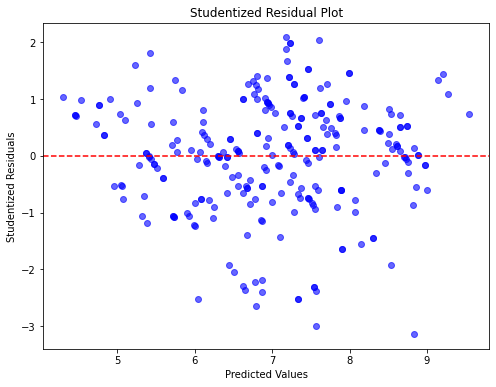

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(model3.fittedvalues, studentized_residuals, c='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residual Plot')
plt.show()

## Another option 

In [23]:
stud_residuals_df = model3.outlier_test()
stud_residuals = stud_residuals_df["student_resid"]

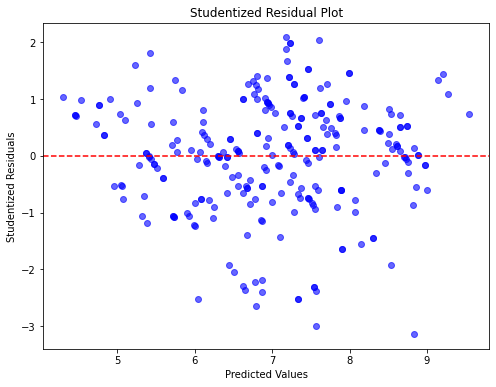

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(model3.fittedvalues, studentized_residuals, c='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residual Plot')
plt.show()

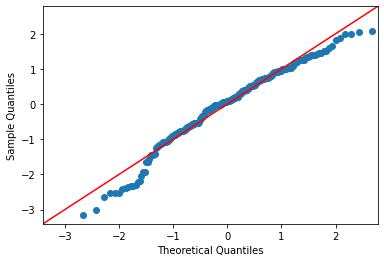

In [25]:
# Normal Q-Q Plot with regular residuals
sm.qqplot(studentized_residuals, fit=True, line='45')
plt.show()

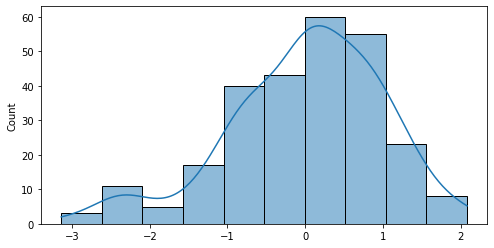

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(studentized_residuals, bins=10, kde=True)
plt.show()

## Sequence plot 

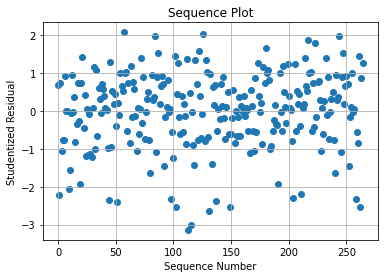

In [27]:
plt.scatter(X2.index, studentized_residuals)
plt.grid()
plt.xlabel("Sequence Number")
plt.ylabel("Studentized Residual")
plt.title("Sequence Plot")
plt.show()

## VIF

In [28]:
## Creating a custom VIF calculation formula that returns the VIF values for the X-variables

## Python has a built-in VIf function but that does not invoke a beta0 (intercept) value while fitting the regression.So we are using custom code
def _vif_cal(input_data: pd.DataFrame) -> str:
    x_vars = input_data
    xvar_names = input_data.columns
    vif_values = []
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = smf.ols(formula="y~x", data=x_vars).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        vif_values.append(vif)
        print(xvar_names[i], " VIF = ", vif)

def check_multicollinearity_assumption(
    x_variables: pd.DataFrame,
) -> str:
    print(
        "The data frame containing the Variance Inflation Factor values are given below"
    )
    _vif_cal(x_variables)

In [29]:
check_multicollinearity_assumption(X2)

The data frame containing the Variance Inflation Factor values are given below
X1  VIF =  3.39
X12  VIF =  3.83
X5  VIF =  1.6
X3  VIF =  1.51
X9  VIF =  4.22
X6  VIF =  2.77
X15  VIF =  1.1
X4  VIF =  2.17
X7  VIF =  3.0
X18  VIF =  5.18


In [30]:
from scipy.stats import shapiro

#Shapiro-Wilk test
shapiro(studentized_residuals)

ShapiroResult(statistic=0.9701460003852844, pvalue=2.4452518118778244e-05)

In [31]:
model.bic

517.6562453677494

In [32]:
model3.bic

432.3198633456976

In [33]:
leverage = model3.get_influence().hat_matrix_diag

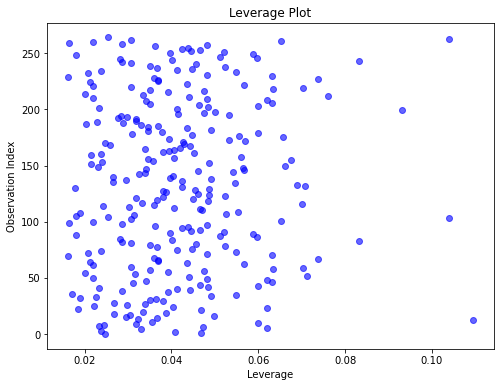

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(leverage, range(len(Y)), c='blue', alpha=0.6)
#plt.axhline(y=(2 * len(X2) / len(Y)), color='red', linestyle='--')  # Cook's distance threshold
plt.ylabel('Observation Index')
plt.xlabel('Leverage')
plt.title('Leverage Plot')
plt.show()

## Leverage plots for the most important variables

In [35]:
X4 = B2B_df[['X1']]

In [36]:
model4 = sm.OLS( Y, sm.add_constant(X4)).fit()
#y_prediccion = model.predict(X)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    X19   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     232.9
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           4.33e-38
Time:                        16:58:44   Log-Likelihood:                -343.99
No. Observations:                 265   AIC:                             692.0
Df Residuals:                     263   BIC:                             699.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9301      0.146     33.847      0.000       4.643       5.217
X1             1.0206      0.067     15.260      0.000       0.889       1.152
==============================================================================
Omnibus:                        1.672   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.455
Skew:                           0.043   Prob(JB):                        0.483
Kurtosis:                       3.353   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
leverage4 = model4.get_influence().hat_matrix_diag

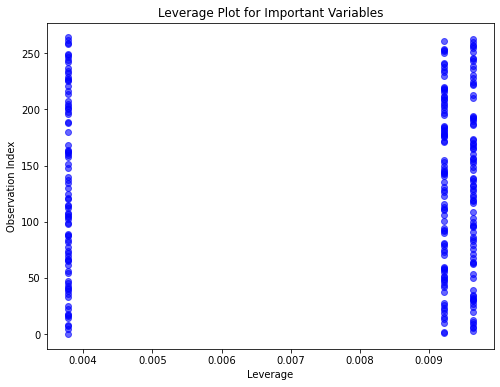

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(leverage4, range(len(Y)), c='blue', alpha=0.6)
#plt.axhline(y=(2 * len(X3) / len(Y)), color='red', linestyle='--')  # Cook's distance threshold
plt.ylabel('Observation Index')
plt.xlabel('Leverage')
plt.title('Leverage Plot for Important Variables')
plt.show()

In [51]:
X5 = B2B_df[['X18']]

In [52]:
model5 = sm.OLS( Y, sm.add_constant(X5)).fit()
#y_prediccion = model.predict(X)
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    X19   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     173.8
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           8.19e-31
Time:                        17:00:17   Log-Likelihood:                -360.79
No. Observations:                 265   AIC:                             725.6
Df Residuals:                     263   BIC:                             732.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0481      0.305     10.006      0.000       2.448       3.648
X18            1.0291      0.078     13.184      0.000       0.875       1.183
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.761
Skew:                          -0.199   Prob(JB):                        0.415
Kurtosis:                       3.040   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
leverage5 = model5.get_influence().hat_matrix_diag

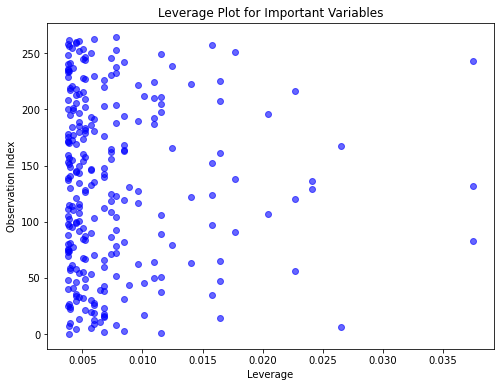

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(leverage5, range(len(Y)), c='blue', alpha=0.6)
#plt.axhline(y=(2 * len(X3) / len(Y)), color='red', linestyle='--')  # Cook's distance threshold
plt.ylabel('Observation Index')
plt.xlabel('Leverage')
plt.title('Leverage Plot for Important Variables')
plt.show()

In [43]:
X1_x_X2 = B2B_df['X1'] * B2B_df['X2']

In [44]:
X1_x_X2

0      0
1      3
2      0
3      1
4      0
      ..
260    1
261    0
262    2
263    1
264    0
Length: 265, dtype: int64

In [45]:
B2B_df['X1_x_X2'] = X1_x_X2

In [46]:
B2B_df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X1_x_X2
0,1,2,0,1,1,1,8.5,3.9,2.5,5.9,...,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1,0
1,2,3,1,0,0,0,8.2,2.7,5.1,7.2,...,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0,3
2,3,3,0,1,1,1,9.2,3.4,5.6,5.6,...,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1,0
3,4,1,1,1,1,0,6.4,3.3,7.0,3.7,...,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0,1
4,5,2,0,1,0,1,9.0,3.4,5.2,4.6,...,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0,0


In [47]:
X_int = B2B_df[['X1', 'X12', 'X5', 'X3', 'X9', 'X6', 'X15', 'X4', 'X7', 'X18', 'X1_x_X2']]

In [48]:
model_int = sm.OLS( Y, sm.add_constant(X_int)).fit()
#y_prediccion = model.predict(X)
model_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    X19   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     120.7
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           6.26e-94
Time:                        16:58:45   Log-Likelihood:                -185.28
No. Observations:                 265   AIC:                             394.6
Df Residuals:                     253   BIC:                             437.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2951      0.385      0.766      0.444      -0.463       1.054
X1             0.3328      0.074      4.490      0.000       0.187       0.479
X12            0.4475      0.055      8.113      0.000       0.339       0.556
X5             0.5697      0.078      7.259      0.000       0.415       0.724
X3             0.5082      0.075      6.746      0.000       0.360       0.657
X9             0.1584      0.052      3.032      0.003       0.056       0.261
X6             0.2320      0.038      6.180      0.000       0.158       0.306
X15            0.0586      0.021      2.733      0.007       0.016       0.101
X4            -0.3317      0.092     -3.610      0.000      -0.513      -0.151
X7            -0.1790      0.074     -2.408      0.017      -0.325      -0.033
X18            0.2747      0.094      2.921      0.004       0.089       0.460
X1_x_X2       -0.0191      0.031     -0.607      0.544      -0.081       0.043
==============================================================================
Omnibus:                       17.085   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.471
Skew:                          -0.618   Prob(JB):                     9.75e-05
Kurtosis:                       3.383   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


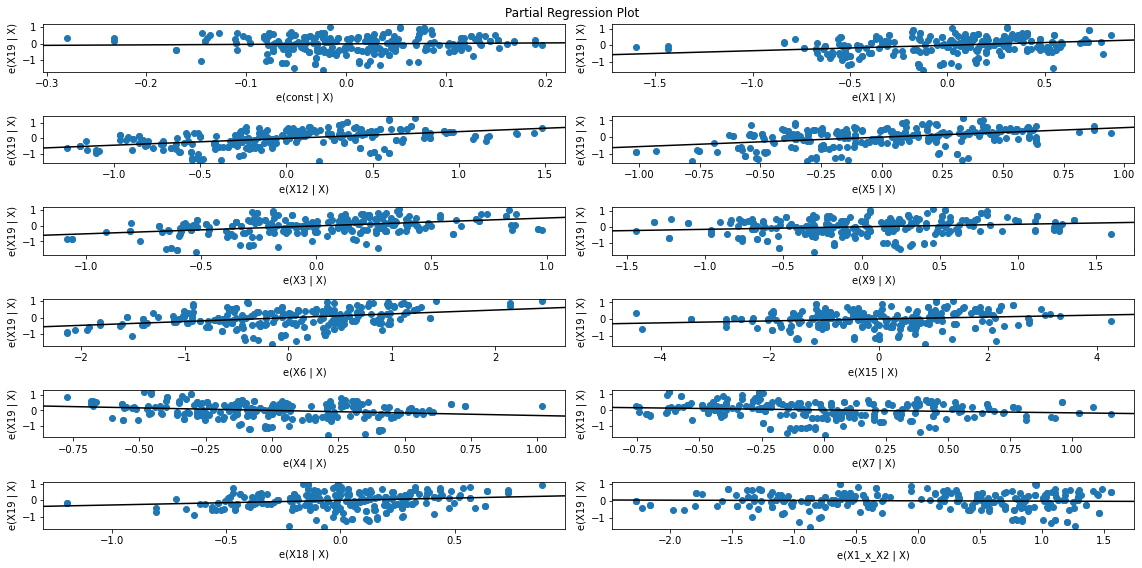

In [49]:
plt.rcParams["figure.figsize"] = (16,8)
sm.graphics.plot_partregress_grid(model_int)
plt.show()

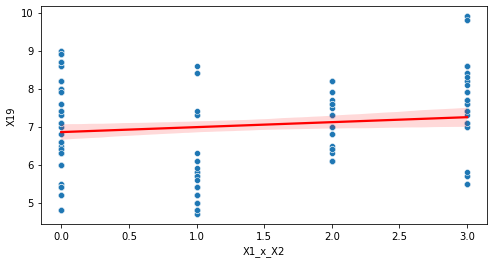

In [50]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data = B2B_df, x='X1_x_X2', y='X19')
sns.regplot(data = B2B_df, x='X1_x_X2', y='X19', scatter=False, color='red')  # Adding the trendline
plt.show()